In [9]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import KFold , cross_val_predict , GridSearchCV , train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from scipy.stats.mstats import normaltest

from math import radians, cos, asin, acos, sqrt

In [11]:
data = pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:
data['brand'] = data.CarName.str.split(' ').str.get(0).str.lower()

In [17]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [18]:
data['brand'] = data['brand'].replace(['vokswagen' , 'vw'] , 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'] , 'mazda')
data['brand'] = data['brand'].replace(['toyouta'] , 'toyota')
data['brand'] = data['brand'].replace(['porcshce'] , 'porsche')

In [19]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<AxesSubplot:>

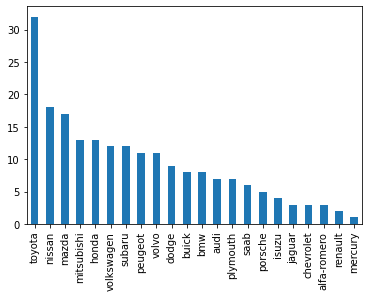

In [20]:
data['brand'].value_counts().plot(kind='bar')

In [21]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

<AxesSubplot:>

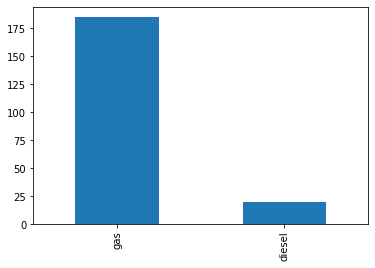

In [22]:
data['fueltype'].value_counts().plot(kind='bar')

In [23]:
data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [24]:
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [25]:
data.drop(['car_ID' , 'symboling' , 'CarName'] , axis=1 , inplace = True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

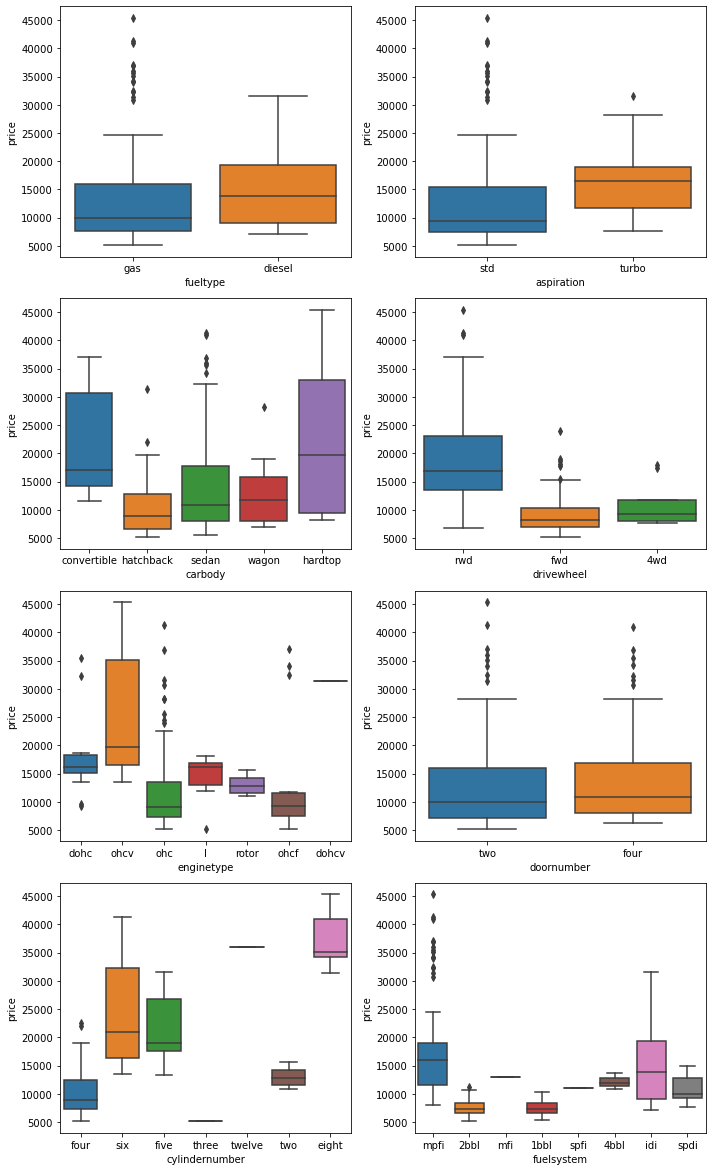

In [27]:
plt.figure(figsize=(10, 20))
plt.subplot(5,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(5,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(5,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(5,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(5,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(5,2,6)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(5,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(5,2,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.tight_layout()
plt.show()

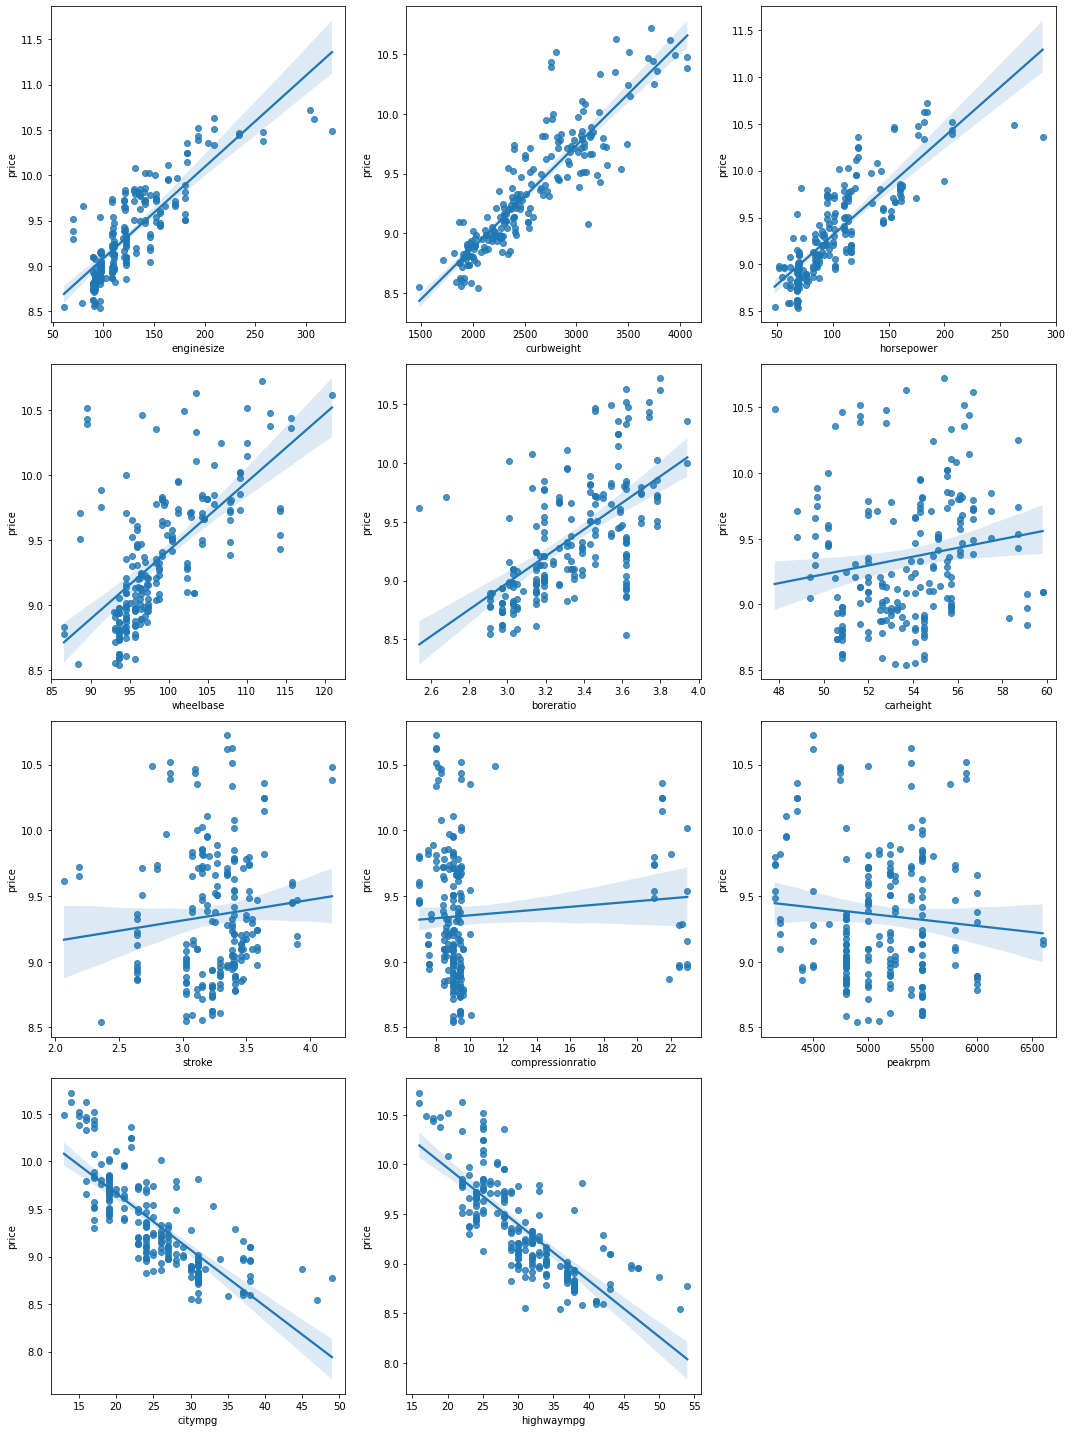

In [61]:
plt.figure(figsize=(15, 20))
plt.subplot(4,3,1)
sns.regplot(x = 'enginesize', y = 'price', data = data)
plt.subplot(4,3,2)
sns.regplot(x = 'curbweight', y = 'price', data = data)
plt.subplot(4,3,3)
sns.regplot(x = 'horsepower', y = 'price', data = data)
plt.subplot(4,3,4)
sns.regplot(x = 'wheelbase', y = 'price', data = data)
plt.subplot(4,3,5)
sns.regplot(x = 'boreratio', y = 'price', data = data)
plt.subplot(4,3,6)
sns.regplot(x = 'carheight', y = 'price', data = data)
plt.subplot(4,3,7)
sns.regplot(x = 'stroke', y = 'price', data = data)
plt.subplot(4,3,8)
sns.regplot(x = 'compressionratio', y = 'price', data = data)
plt.subplot(4,3,9)
sns.regplot(x = 'peakrpm', y = 'price', data = data)
plt.subplot(4,3,10)
sns.regplot(x = 'citympg', y = 'price', data = data)
plt.subplot(4,3,11)
sns.regplot(x = 'highwaympg', y = 'price', data = data)
plt.tight_layout()
plt.show()

In [29]:
numeric_data = data.select_dtypes(include = ['number'])
corr = numeric_data.corr()['price'].sort_values(ascending=False)
corr

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

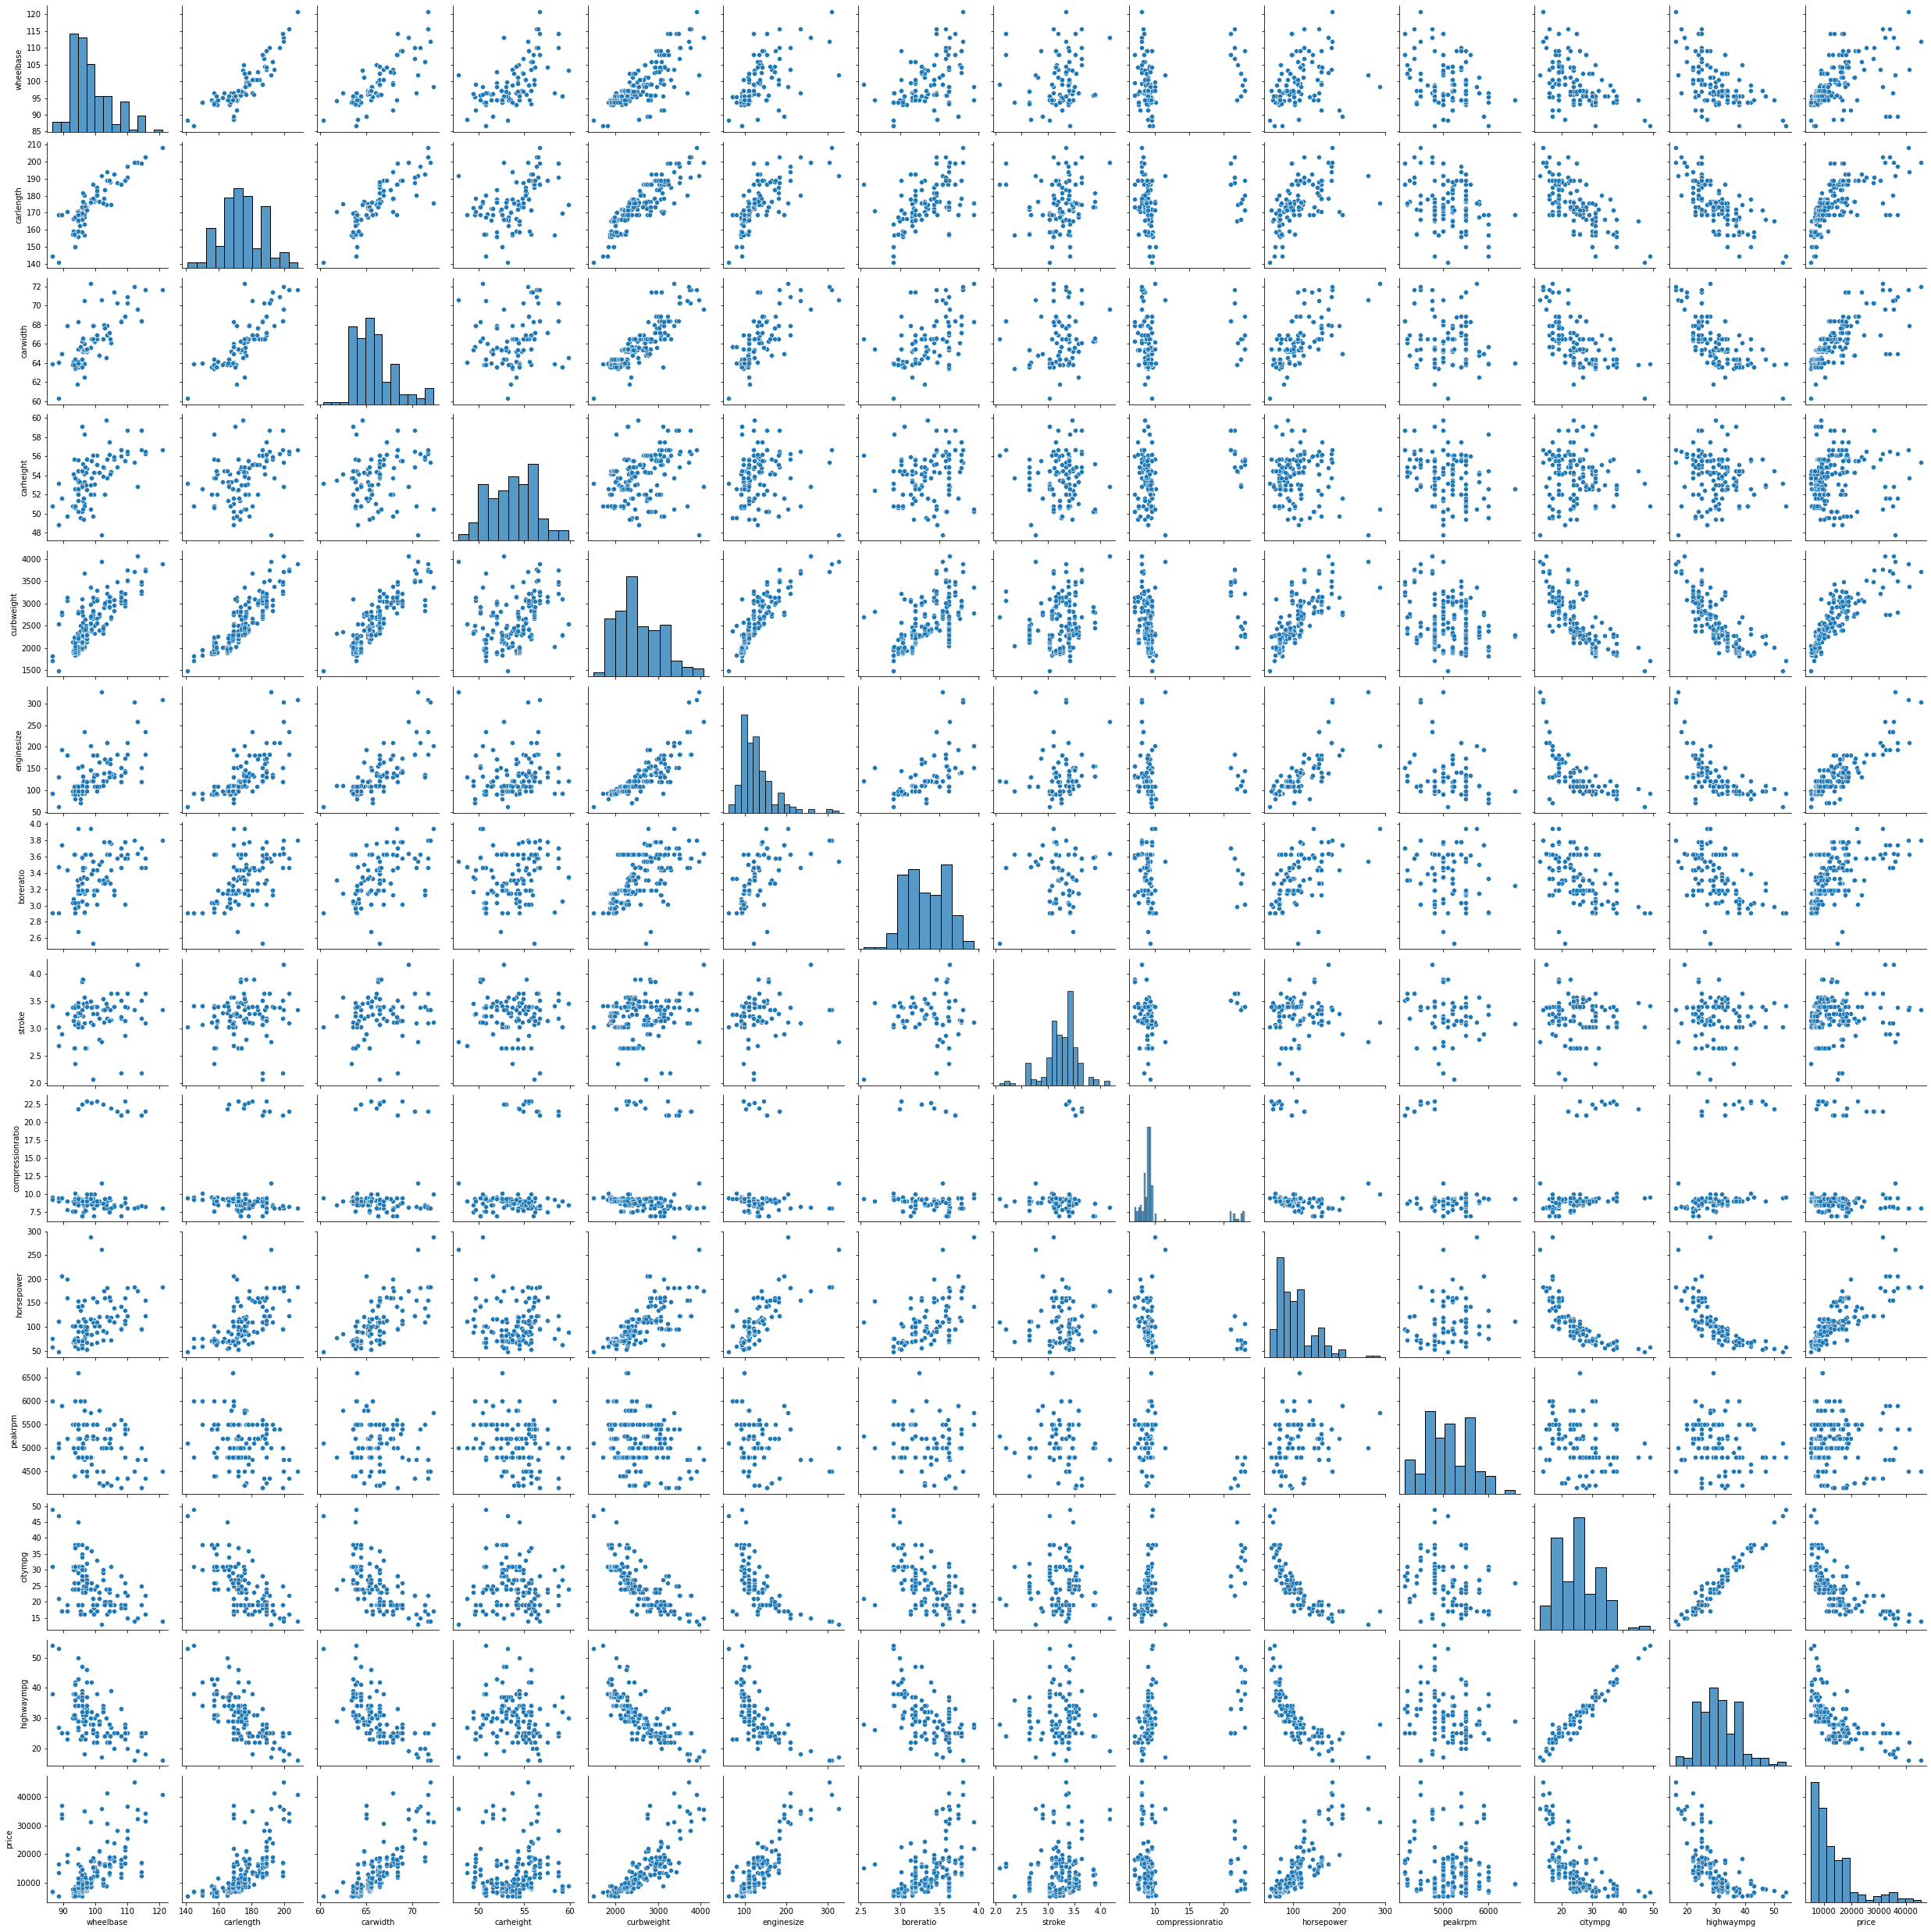

In [30]:
sns.pairplot(data)
plt.show()

<h3>Checking the target distribution</h3>

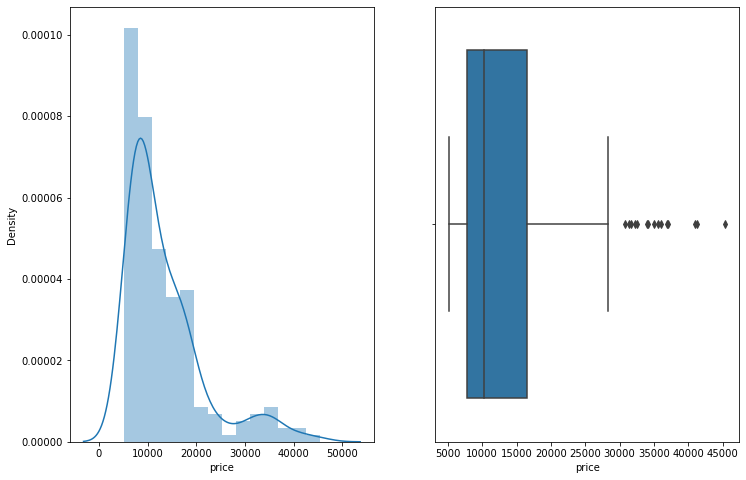

In [31]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.distplot(data['price'])

plt.subplot(1,2,2)
sns.boxplot(data['price'])

plt.show()

In [32]:
normaltest(data.price.values)

NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

In [33]:
from scipy.stats import boxcox

In [34]:
cp_result = boxcox(data.price)
boxcox_price = cp_result[0]
normaltest(boxcox_price)

NormaltestResult(statistic=16.727142005583726, pvalue=0.00023321005129893173)

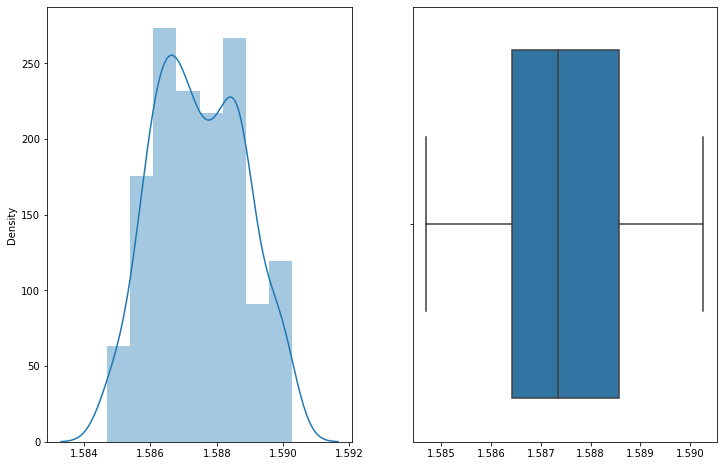

In [35]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.distplot(boxcox_price)

plt.subplot(1,2,2)
sns.boxplot(boxcox_price)

plt.show()

In [36]:
log_price = np.log(data['price'])
normaltest(log_price)

NormaltestResult(statistic=14.10341345775947, pvalue=0.0008659297880185564)

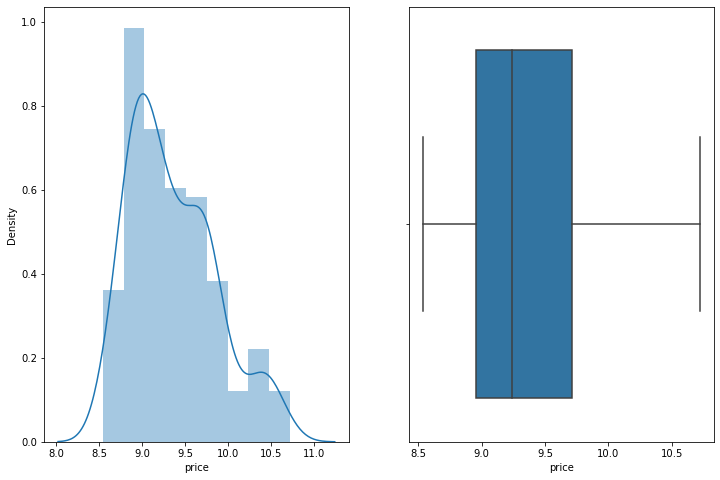

In [37]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.distplot(log_price)

plt.subplot(1,2,2)
sns.boxplot(log_price)

plt.show()

<h6>Data is better but p-value is still small</h6>

In [38]:
data['price'] = log_price

<h3>Checking multicolliniarity</h3>

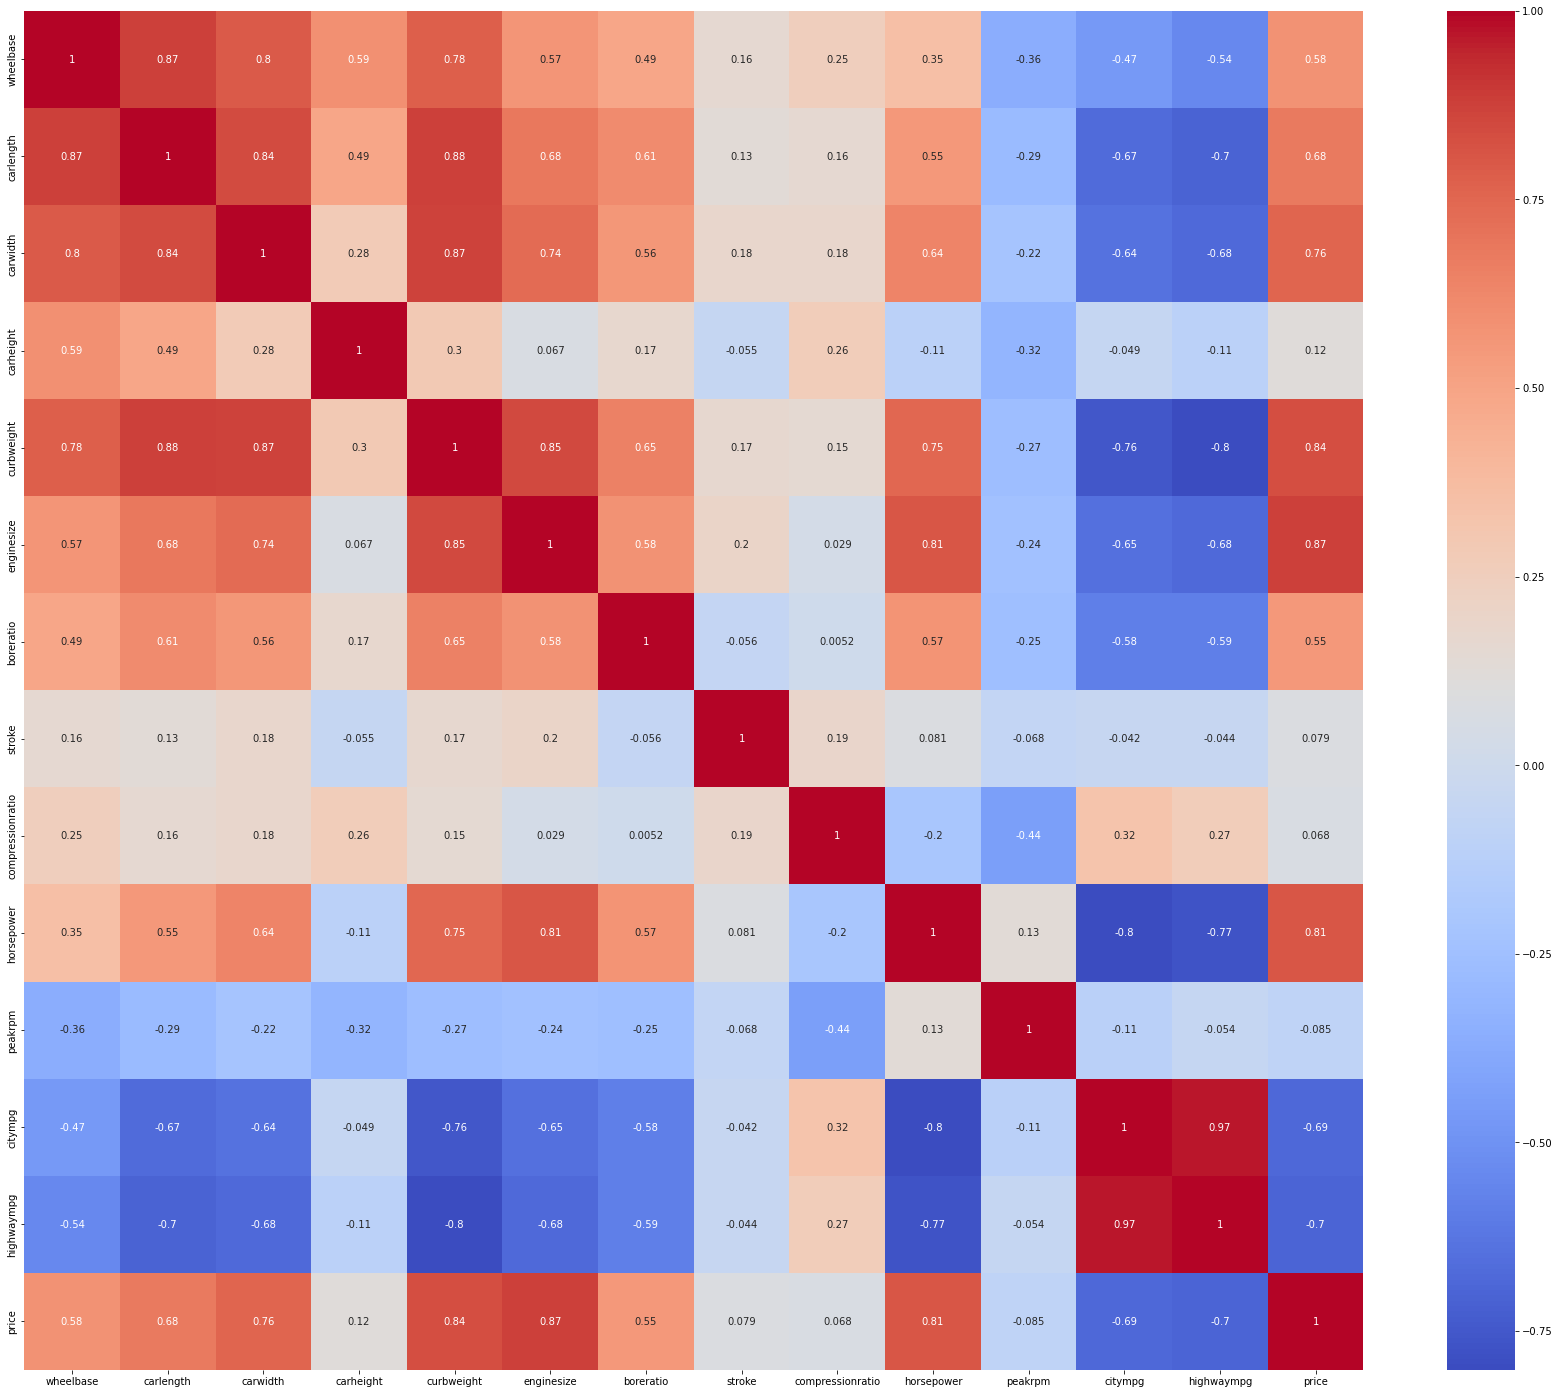

In [39]:
plt.figure(figsize = (30,25))
sns.heatmap(numeric_data.corr() , annot=True, cmap='coolwarm')
plt.show()

<h6>We found that we have some multicolliniarity we can reduce it by using ridge or lasso regression</h6>

In [40]:
columns=['price', 'fueltype','fuelsystem', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand'
         ,'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
         'carlength','carwidth','citympg','highwaympg']
selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   fuelsystem      205 non-null    object 
 3   aspiration      205 non-null    object 
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   wheelbase       205 non-null    float64
 7   brand           205 non-null    object 
 8   curbweight      205 non-null    int64  
 9   enginetype      205 non-null    object 
 10  cylindernumber  205 non-null    object 
 11  enginesize      205 non-null    int64  
 12  boreratio       205 non-null    float64
 13  horsepower      205 non-null    int64  
 14  carlength       205 non-null    float64
 15  carwidth        205 non-null    float64
 16  citympg         205 non-null    int64  
 17  highwaympg      205 non-null    int

In [41]:
encoded = pd.get_dummies(selected)
encoded

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,9.510075,88.6,2548,130,3.47,111,168.8,64.1,21,27,...,0,0,0,0,0,1,0,0,0,0
1,9.711116,88.6,2548,130,3.47,111,168.8,64.1,21,27,...,0,0,0,0,0,1,0,0,0,0
2,9.711116,94.5,2823,152,2.68,154,171.2,65.5,19,26,...,0,1,0,0,0,0,1,0,0,0
3,9.543235,99.8,2337,109,3.19,102,176.6,66.2,24,30,...,0,0,0,0,0,1,0,0,0,0
4,9.767095,99.4,2824,136,3.19,115,176.6,66.4,18,22,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,9.731809,109.1,2952,141,3.78,114,188.8,68.9,23,28,...,0,0,0,0,0,1,0,0,0,0
201,9.854560,109.1,3049,141,3.78,160,188.8,68.8,19,25,...,0,0,0,0,0,1,0,0,0,0
202,9.975110,109.1,3012,173,3.58,134,188.8,68.9,18,23,...,0,1,0,0,0,0,1,0,0,0
203,10.019936,109.1,3217,145,3.01,106,188.8,68.9,26,27,...,0,0,0,0,0,0,1,0,0,0


In [42]:
x = encoded.drop('price' , axis=1)
x.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,fueltype_diesel,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,2548,130,3.47,111,168.8,64.1,21,27,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,2548,130,3.47,111,168.8,64.1,21,27,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,2823,152,2.68,154,171.2,65.5,19,26,0,...,0,1,0,0,0,0,1,0,0,0
3,99.8,2337,109,3.19,102,176.6,66.2,24,30,0,...,0,0,0,0,0,1,0,0,0,0
4,99.4,2824,136,3.19,115,176.6,66.4,18,22,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
y = selected['price'].copy()
y.head()

0    9.510075
1    9.711116
2    9.711116
3    9.543235
4    9.767095
Name: price, dtype: float64

In [44]:
estimator = Pipeline([('scaler' , StandardScaler()),('lr' , LinearRegression())])

In [45]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [46]:
predictions = cross_val_predict(estimator, x, y, cv=kf)

In [47]:
r2_score(y, predictions)

-1.605463660217285e+24

<h3>There is overfitting because r2 score is negative, We can solve this problem by regularization .</h3>

In [48]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [49]:
scores = []

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, x, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)


In [50]:
list(zip(alphas,scores))

[(1e-09, 0.9095278486783316),
 (1e-08, 0.9095279903269072),
 (1e-07, 0.9086463442342586),
 (1e-06, 0.905356508880481),
 (1e-05, 0.9058696500916263),
 (0.0001, 0.9103003798226019),
 (0.001, 0.923795787619447),
 (0.01, 0.9205043206510561),
 (0.1, 0.7977917644310528),
 (1.0, -0.003043554066154419)]

Text(0, 0.5, '$R^2$')

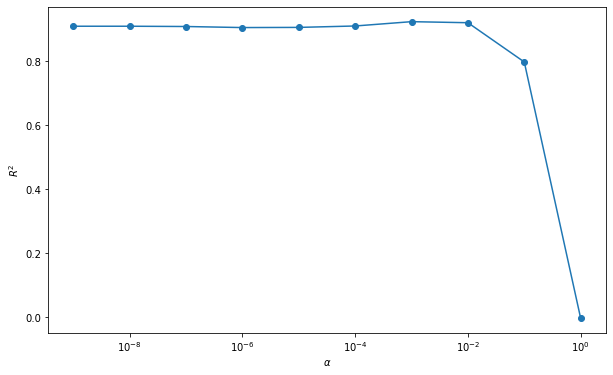

In [51]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')

<h3>Best score is at .001 </h3>

In [52]:
las = Lasso(alpha=.001, max_iter=100000)

estimator = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso_regression", las)])

predictions = cross_val_predict(estimator, x, y, cv = kf)

score = r2_score(y, predictions)
score

0.923795787619447

<h3>Using GridSearchCV for hyperparameter tuning</h3>

In [53]:
estimator = Pipeline([("polynomial", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("lasso", Lasso())])

params = {
    'polynomial__degree': [1, 2, 3],
    'lasso__alpha': np.geomspace(1e-9, 1e0, num=10)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [54]:
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00]),
                         'polynomial__degree': [1, 2, 3]})

In [55]:
y_predict = grid.predict(x)

In [56]:
r2_score(y, y_predict)

0.9593315562167685

In [57]:
estimator = Pipeline([("polynomial", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("ridge", Ridge())])

params = {
    'polynomial__degree': [1, 2, 3],
    'ridge__alpha': np.geomspace(4, 20, num=20)
}

grid1 = GridSearchCV(estimator, params, cv=kf)

In [58]:
grid1.fit(x,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomial__degree': [1, 2, 3],
                         'ridge__alpha': array([ 4.        ,  4.3535936 ,  4.73844431,  5.15731521,  5.61321363,
        6.10941274,  6.64947505,  7.23727802,  7.87704182,  8.57335972,
        9.331231  , 10.1560969 , 11.05387963, 12.03102491, 13.09454827,
       14.25208539, 15.51194695, 16.88317825, 18.37562421, 20.        ])})

In [59]:
y_predict = grid.predict(x)

In [60]:
r2_score(y, y_predict)

0.9593315562167685